# Basic Data Analysis 
- Pandas Dataframe Analysis
- Descriptive Statistics
- Data Visualizations

In [76]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
#import csv file as Pandas Dataframe
data = pd.read_csv("supermarket_sales - Sheet1.csv")
#Print head of Data
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
#Print shape of data
data.shape

(1000, 17)

In [6]:
#Data Informatiob
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Descriptive Statistics

In [7]:
#Compute the five number summary
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
#Compute descriptive statistics off categorical data
data.describe(include=object)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,503-21-4385,A,Yangon,Member,Female,Fashion accessories,2/7/2019,14:42,Ewallet
freq,1,340,340,501,501,178,20,7,345


### Data Mining

Performing boolean operations within Pandas Dataframe (np.logical)

In [98]:
#Customers in Yangon how spent greater than the average for all Gross Income
display(data[np.logical_and(data['City'] == 'Yangon', data['gross income'] > 15.3)])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,809-69-9497,A,Yangon,Normal,Female,Home and lifestyle,45.68,10,22.8400,479.6400,1/19/2019,19:30,Ewallet,456.80,4.761905,22.8400,5.7
945,489-82-1237,A,Yangon,Normal,Female,Electronic accessories,93.88,7,32.8580,690.0180,1/5/2019,11:51,Credit card,657.16,4.761905,32.8580,7.3
959,384-59-6655,A,Yangon,Member,Female,Food and beverages,98.66,9,44.3970,932.3370,2/19/2019,15:07,Cash,887.94,4.761905,44.3970,8.4
982,139-32-4183,A,Yangon,Member,Female,Sports and travel,97.48,9,43.8660,921.1860,3/14/2019,14:19,Ewallet,877.32,4.761905,43.8660,7.4


In [103]:
#Customers buying fashion accessories who are from Naypyitawy City
display(data[np.logical_and(data['City'] == 'Yangon', data['Product line'] == 'Fashion accessories')])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
27,189-17-4241,A,Yangon,Normal,Female,Fashion accessories,87.67,2,8.7670,184.1070,3/10/2019,12:17,Credit card,175.34,4.761905,8.7670,7.7
77,381-20-0914,A,Yangon,Member,Female,Fashion accessories,20.01,9,9.0045,189.0945,1/12/2019,15:48,Credit card,180.09,4.761905,9.0045,5.7
146,685-64-1609,A,Yangon,Member,Female,Fashion accessories,30.14,10,15.0700,316.4700,2/10/2019,12:28,Ewallet,301.40,4.761905,15.0700,9.2
152,746-94-0204,A,Yangon,Normal,Male,Fashion accessories,83.24,9,37.4580,786.6180,1/29/2019,11:56,Credit card,749.16,4.761905,37.4580,7.4
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.4900,1039.2900,2/8/2019,16:20,Credit card,989.80,4.761905,49.4900,8.7
239,478-06-7835,A,Yangon,Normal,Male,Fashion accessories,89.69,1,4.4845,94.1745,1/11/2019,11:20,Ewallet,89.69,4.761905,4.4845,4.9
247,604-70-6476,A,Yangon,Member,Male,Fashion accessories,17.94,5,4.4850,94.1850,1/23/2019,14:04,Ewallet,89.70,4.761905,4.4850,6.8
309,848-42-2560,A,Yangon,Normal,Female,Fashion accessories,81.91,2,8.1910,172.0110,3/5/2019,17:43,Cash,163.82,4.761905,8.1910,7.8
323,563-91-7120,A,Yangon,Normal,Female,Fashion accessories,61.77,5,15.4425,324.2925,3/8/2019,13:21,Cash,308.85,4.761905,15.4425,6.7
332,566-71-1091,A,Yangon,Normal,Male,Fashion accessories,77.02,5,19.2550,404.3550,2/3/2019,15:59,Cash,385.10,4.761905,19.2550,5.5


### Missing Data

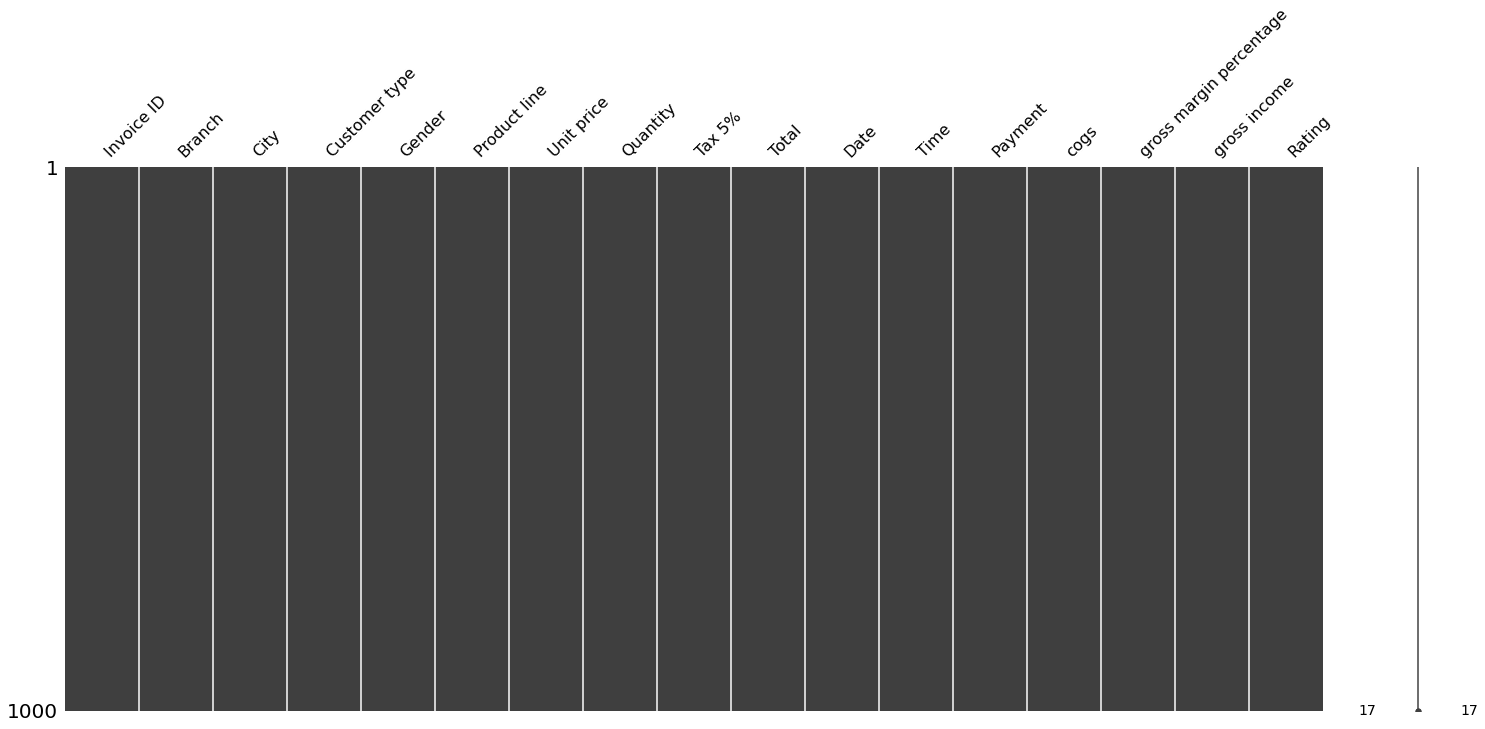

In [12]:
#Missingness Matrix
msno.matrix(data)

In [16]:
#Sum total of missing value's
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

We can confirm there are no missing value's present within the data 

# Data Visualization

Writing Functions for Data Visualizations

In [87]:
#Functions forSeaborn Lbrary Visualizations

###Informative Quantitative Plots (Numeric)
#Kernel Density Plot
def Kdensity(X):
    %matplotlib inline
    plt.figure(figsize=(5, 5))
    sns.set_style('whitegrid')
    sns.kdeplot(np.array(data[X]))

#Scatterplot Function
def scatter(X,Y):
    sns.scatterplot(x = (X), y = (Y), data = data, alpha = 0.4)
    plt.show()
    
    print("Correlation: ", data[X].corr(data[Y]))
    
#Scatterplot Function with a third variable(hue)
def scatterH(X,Y,H):
    sns.scatterplot(x = (X), y = (Y), 
                    data = data, hue = (H))
    plt.show()

#Relational Scatter-Plot
def scatterR(X,Y,C,N):
    sns.relplot(x = (X), y = (Y),
               data = data, kind = 'scatter',
               col = (C), col_wrap = N)
    plt.show()

#Relational Line-Plot
def lineplotR(X,Y,C,N):
    sns.relplot(x = (X), y = (Y),
               data = bank, kind = 'line',
               col = (C), col_wrap = N)
    plt.show()
    

###Seaborn Library Informative Categorical-Plots
#Countplot
def countplot(X,N):
    sns.catplot(x = (X), data = data,
                kind = 'count')
    plt.xticks(rotation = N)
    plt.show()
    """Display value counts of each category within specific variable"""
    display(data[X].value_counts())
    
#Barplot
def barplot(X,Y):
    print("Note: Barplots display mean(AVERAGE) of quantative variable per category")
    sns.catplot(x = (X), y = (Y), 
                data = data, kind = 'bar')
    plt.show()
    
    print(data[X].value_counts())
    
#Box-Plot
def boxplot(X,Y,N):
    sns.catplot(x = (X), y = (Y),
               data = data, kind = 'box')
    plt.xticks(rotation = N)
    plt.show()

### Data Visualizations

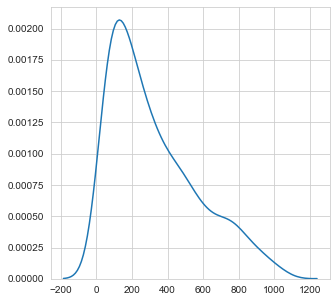

In [88]:
Kdensity('Total')

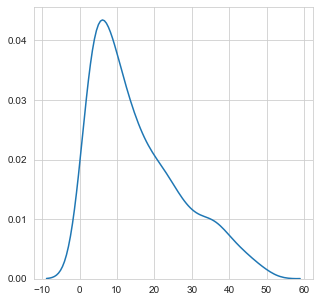

In [91]:
Kdensity('gross income')

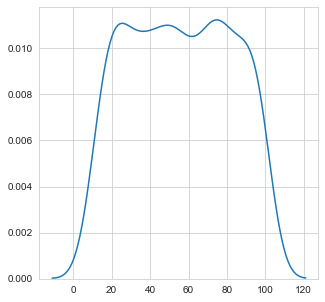

In [92]:
Kdensity('Unit price')

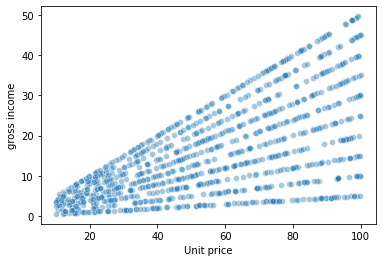

Correlation:  0.6339620885890692


In [21]:
scatter('Unit price','gross income')

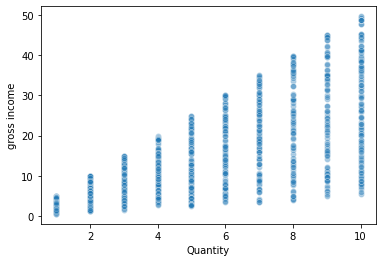

Correlation:  0.7055101859433069


In [22]:
scatter('Quantity','gross income')

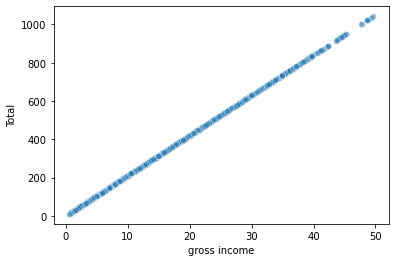

Correlation:  0.9999999999999997


In [25]:
scatter('gross income','Total')

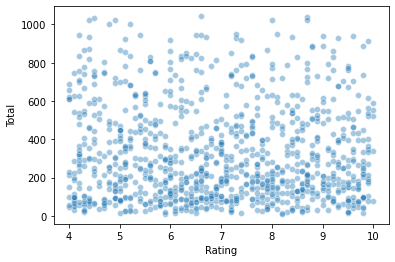

Correlation:  -0.03644170499701835


In [27]:
scatter('Rating','Total')

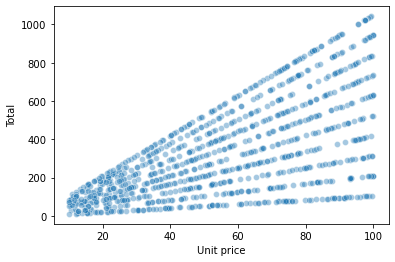

Correlation:  0.6339620885890693


In [28]:
scatter('Unit price','Total')

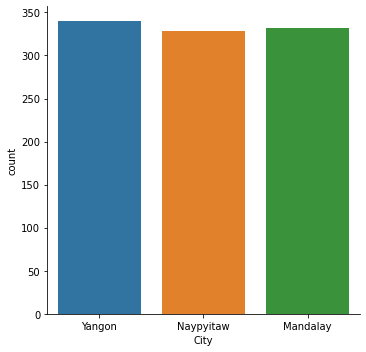

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [62]:
countplot('City',0)

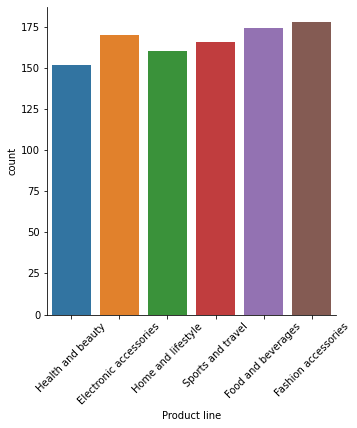

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [63]:
countplot('Product line',45)

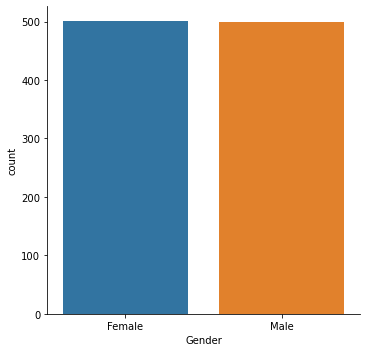

Female    501
Male      499
Name: Gender, dtype: int64

In [64]:
countplot('Gender',0)

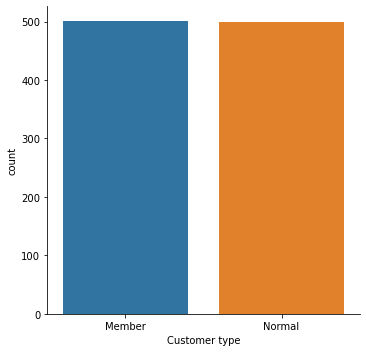

Member    501
Normal    499
Name: Customer type, dtype: int64

In [65]:
countplot('Customer type',0)

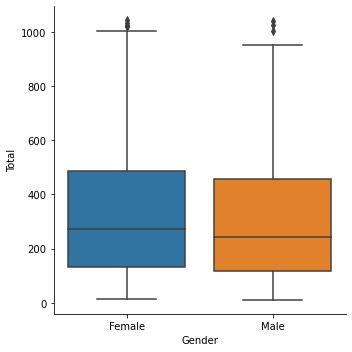

In [66]:
boxplot('Gender','Total',0)

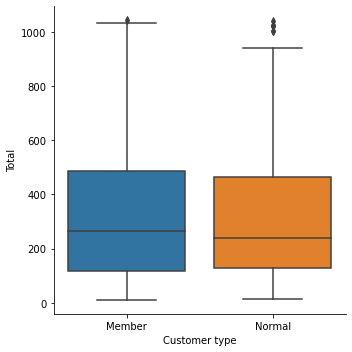

In [67]:
boxplot('Customer type','Total',0)

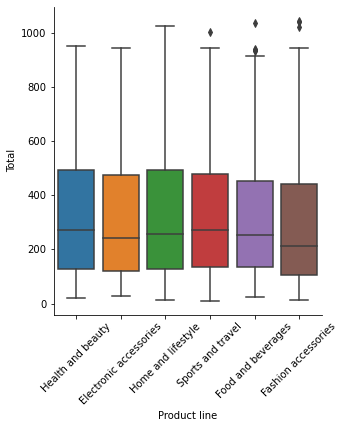

In [70]:
boxplot('Product line','Total',45)

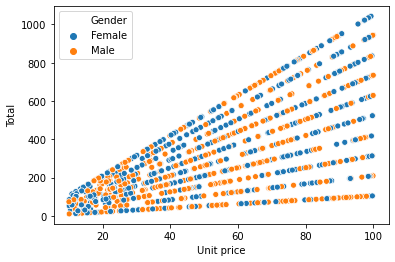

In [71]:
scatterH('Unit price','Total','Gender')

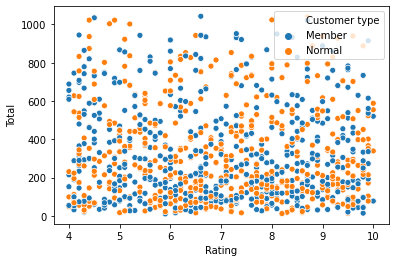

In [74]:
scatterH('Rating','Total','Customer type')